<a href="https://colab.research.google.com/github/effection00/codestates/blob/main/section2/n212a%201%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [313]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요
- **훈련데이터 샘플의 갯수를 과제 제출폼에 제출하세요.**

In [314]:
### 이곳에서 과제를 진행해 주세요 ###

# 날짜 고려
train = df.drop(df[df['date'].str.contains("2015")].index)
test = df[df['date'].str.contains("2015")]

### 2) 두 특성(bathrooms, sqft_living)을 사용해서 다중선형회귀 모델을 만들어 보세요
- 학습시 Parameters는 모두 기본값으로 합니다.
- **테스트세트의 MAE 값을 과제 제출폼에 제출하세요.**

In [315]:
### 이곳에서 과제를 진행해 주세요 ###

feature = ['bathrooms','sqft_living']
X_train = train[feature]
y_train = train['price']
X_test = test[feature]
y_test = test['price']

In [316]:
#모델 fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)

#train 데이터
mae = mean_absolute_error(y_train, train_pred)
print(f"훈련에러:{mae:.2f}")

훈련에러:170777.34


In [317]:
#test 데이터
test_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, test_pred)
print(f"테스트 에러 : {mae :.2f}")

테스트 에러 : 179252.53


### 3) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.
- **sqft_living의 회귀계수를 과제 제출폼에 제출하세요.**

In [318]:
### 이곳에서 과제를 진행해 주세요 

model.intercept_ ,model.coef_
# 회귀식 만들기
b0 = model.intercept_
b1,b2 = model.coef_
b0,b1,b2

(-50243.56279640319, -5158.925914109234, 286.1375355497683)

In [319]:
print(f"y = {b0:.0f} + {b1:.0f}x\u2081 + {b2:.0f}x\u2082 ")

#sqft_living의  회귀계수 : 286

y = -50244 + -5159x₁ + 286x₂ 


### 4) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요
- **테스트 데이터에 대한 R^2 값을 과제 제출폼에 제출하세요.**

In [320]:
### 이곳에서 과제를 진행해 주세요 ###
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import numpy as np

#MSE
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
print(f"훈련데이터 MSE:{train_mse:.2f}")
print(f"테스트데이터 MSE:{test_mse:.2f}")
print()
#RMSE
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print(f"훈련데이터 MAE:{train_mae:.2f}")
print(f"테스트데이터 MAE:{test_mae:.2f}")
print()

#MAE
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print(f"훈련데이터 RMSE:{train_rmse:.2f}")
print(f"테스트데이터 RMSE:{test_rmse:.2f}")
print()

#R^2
train_R2 = r2_score(y_train, train_pred)
test_R2 = r2_score(y_test, test_pred)
print(f"훈련데이터 R^2:{train_R2:.2f}")
print(f"테스트데이터 R^2:{test_R2:.2f}")
print()

훈련데이터 MSE:67099053309.95
테스트데이터 MSE:71083994178.76

훈련데이터 MAE:170777.34
테스트데이터 MAE:179252.53

훈련데이터 RMSE:259034.85
테스트데이터 RMSE:266615.82

훈련데이터 R^2:0.51
테스트데이터 R^2:0.46



## 🔥도전과제

### 5) 두가지 이상 특성을 선택하여 특성공학(feature engineering)을 진행합니다. (kaggle notebook을 참고하여 중요한 특성을 고르는 것이 힌트입니다.)
- EDA를 자세히 진행하세요
- 특성공학 과정을 자세히 기술하세요
- 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어를 계산하고 분석하세요
- 만들어진 회귀계수를 사용해 모델을 설명하세요.
- 모델이 과적합인지/과소적합인지 설명하세요.
- 메신저 general 채널에서 4개 스코어를 제시하고 본인이 고른 특성, 특성공학 방법 등을 간략하게 공유하세요

In [321]:
### 이곳에서 과제를 진행해 주세요 ###

#EDA
train = train.drop(['id'],axis=1)
train

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21605,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    1.463300e+04
mean     5.391814e+05
std      3.691627e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

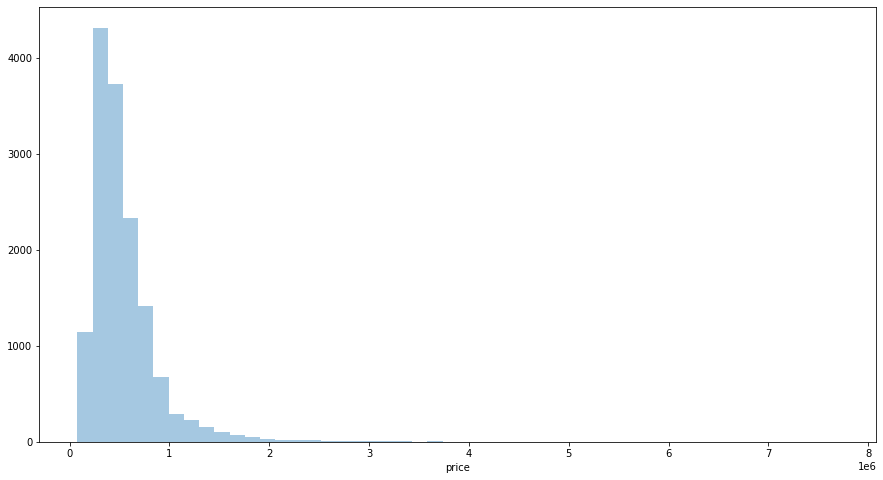

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns

#판매가 분포
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(train['price'], kde=False, ax=ax)
train['price'].describe()

In [323]:
train['sqft_living'].describe()

count    14633.000000
mean      2098.319073
std        929.621019
min        290.000000
25%       1440.000000
50%       1930.000000
75%       2570.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [324]:
train['grade'].unique()

array([ 7, 11,  9,  8,  6,  5, 10,  4, 12, 13,  3,  1])

In [325]:
#feature engineering

# sqft_liviing 선택 : binning
bins = [290,1440,1930,2570,13540]
label = [0,1,2,3]
train['sqft_living'] = pd.cut(train['sqft_living'],bins,right=False,labels=label)

# grade 선택 : 원핫인코더
enc2 = pd.get_dummies(train['grade'])
train = train.drop(['grade'],axis=1)


# 테스트 데이터도 적용

bins = [290,1440,1930,2570,13540]
label = [0,1,2,3]
test['sqft_living'] = pd.cut(test['sqft_living'],bins,right=False,labels=label)


enc4 = pd.get_dummies(test['grade'])
test = test.drop(['grade'],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [326]:
train

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,0,5650,1.0,0,0,3,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,3,7242,2.0,0,0,3,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,20141209T000000,604000.0,4,3.00,2,5000,1.0,0,0,5,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,20140512T000000,1225000.0,4,4.50,3,101930,1.0,0,0,3,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,20140627T000000,257500.0,3,2.25,1,6819,2.0,0,0,3,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,20140825T000000,507250.0,3,2.50,2,5536,2.0,0,0,3,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21605,20141014T000000,610685.0,4,2.50,2,6023,2.0,0,0,3,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21608,20140521T000000,360000.0,3,2.50,1,1131,3.0,0,0,3,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,20140623T000000,402101.0,2,0.75,0,1350,2.0,0,0,3,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [327]:
train = pd.concat([train, enc2],axis=1)
train

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1,3,4,5,6,7,8,9,10,11,12,13
0,20141013T000000,221900.0,3,1.00,0,5650,1.0,0,0,3,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0,0,0,0,1,0,0,0,0,0,0
1,20141209T000000,538000.0,3,2.25,3,7242,2.0,0,0,3,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,0,0,0,0,1,0,0,0,0,0,0
3,20141209T000000,604000.0,4,3.00,2,5000,1.0,0,0,5,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,0,0,0,0,1,0,0,0,0,0,0
5,20140512T000000,1225000.0,4,4.50,3,101930,1.0,0,0,3,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,0,0,0,0,0,0,0,0,0,1,0,0
6,20140627T000000,257500.0,3,2.25,1,6819,2.0,0,0,3,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,20140825T000000,507250.0,3,2.50,2,5536,2.0,0,0,3,2270,0,2003,0,98065,47.5389,-121.881,2270,5731,0,0,0,0,0,0,1,0,0,0,0,0
21605,20141014T000000,610685.0,4,2.50,2,6023,2.0,0,0,3,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,0,0,0,0,0,0,0,1,0,0,0,0
21608,20140521T000000,360000.0,3,2.50,1,1131,3.0,0,0,3,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0,0,0,0,0,0,1,0,0,0,0,0
21610,20140623T000000,402101.0,2,0.75,0,1350,2.0,0,0,3,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0,0,0,0,0,1,0,0,0,0,0,0


In [328]:
test = pd.concat([test, enc4],axis=1)
test

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,3,4,5,6,7,8,9,10,11,12,13
2,5631500400,20150225T000000,180000.0,2,1.0,0,10000,1.0,0,0,3,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0,0,1,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.0,1,8080,1.0,0,0,3,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0,0,0,0,1,0,0,0,0,0
7,2008000270,20150115T000000,291850.0,3,1.5,0,9711,1.0,0,0,3,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,0,0,0,0,1,0,0,0,0,0,0
8,2414600126,20150415T000000,229500.0,3,1.0,1,7470,1.0,0,0,3,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,0,0,0,0,1,0,0,0,0,0,0
9,3793500160,20150312T000000,323000.0,3,2.5,1,6560,2.0,0,0,3,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,9834201367,20150126T000000,429000.0,3,2.0,1,1126,3.0,0,0,3,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,0,0,0,0,0,1,0,0,0,0,0
21606,7936000429,20150326T000000,1007500.0,4,3.5,3,7200,2.0,0,0,3,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,0,0,0,0,0,0,1,0,0,0,0
21607,2997800021,20150219T000000,475000.0,3,2.5,0,1294,2.0,0,0,3,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,0,0,0,0,0,1,0,0,0,0,0
21609,6600060120,20150223T000000,400000.0,4,2.5,2,5813,2.0,0,0,3,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0,0,0,0,0,1,0,0,0,0,0


In [329]:
train.drop(train[train['sqft_living'].isnull()].index, axis=0,inplace=True)
y_train.drop(train[train['sqft_living'].isnull()].index, axis=0,inplace=True)

In [330]:
X_test

,bathrooms,sqft_living
2,1.0,770
4,2.0,1680
7,1.5,1060
8,1.0,1780
9,2.5,1890
...,...,...
21604,2.0,1490
21606,3.5,3510
21607,2.5,1310
21609,2.5,2310


In [331]:
test[1] = None
test[1] = test[1].fillna(0)

In [332]:
feature = train.drop(['price','date'],axis=1).columns
X_train = train[feature]
y_train = train['price']
X_test = test[feature]
y_test = test['price']

In [333]:
model3 = LinearRegression()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
R2 = r2_score(y_train, y_pred)

print(f'MAE 훈련 에러: {mae:.2f}')
print(f'MSE 훈련 에러: {mse:.2f}')
print(f'RMSE 훈련 에러: {rmse:.2f}')
print(f'R^2 훈련 에러: {R2:.2f}')

MAE 훈련 에러: 116210.57
MSE 훈련 에러: 34133577839.40
RMSE 훈련 에러: 184752.75
R^2 훈련 에러: 0.75


In [334]:
# 테스트 데이터 MSE, RMSE, MAE, R2 스코어를 계산
model3 = LinearRegression()
model3.fit(X_test,y_test)
y_pred = model3.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

print(f'MAE 테스트 에러: {mae:.2f}')
print(f'MSE 테스트 에러: {mse:.2f}')
print(f'RMSE 테스트 에러: {rmse:.2f}')
print(f'R^2 테스트 에러: {R2:.2f}')

MAE 테스트 에러: 123256.95
MSE 테스트 에러: 36632197227.55
RMSE 테스트 에러: 191395.40
R^2 테스트 에러: 0.72


In [335]:
# 모델 분석

#훈련에러에 비해 테스트 에러가 오차를 더 많이 내기 때문에 해당 모델은 일반화가 잘 된 모델이라고 볼 수 없다 
#훈련데이터에 과하게 학습이 된 "과적합"이라고 볼 수 있다

## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)